##### Introduction: This case study is a task for the Google Data Analyst Professional Certificate. The goal is to study the usage of smart devices to help Bellabeat  gain insights in one of their products. The case study starts at the next markdown.

<br>
<br>
<br>

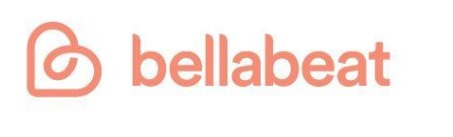
<br>
### Context

In this case study, we'll be examining the data collected from Bellabeat's smart devices to uncover trends that can help improve their product offerings. Let's first take a closer look at the products themselves:

The Bellabeat app offers users valuable health insights related to their activity, sleep, stress, menstrual cycle, and mindfulness habits. By connecting to their line of smart wellness products, users can gain a deeper understanding of their current habits and make informed decisions.

One such product is the Leaf, Bellabeat's classic wellness tracker that can be worn as a bracelet, necklace, or clip. The Leaf tracker seamlessly connects to the Bellabeat app to track activity, sleep, and stress.

Another product in the line is the Time, a wellness watch that combines the timeless look of a classic timepiece with smart technology to track user activity, sleep, and stress. By connecting to the Bellabeat app, users gain valuable insights into their daily wellness.

The Spring, a smart water bottle, tracks daily water intake to ensure users stay hydrated throughout the day. The Spring bottle also connects to the Bellabeat app to track hydration levels.

Lastly, Bellabeat offers a subscription-based membership program that provides users with 24/7 access to personalized guidance on nutrition, activity, sleep, health, and beauty, and mindfulness based on their lifestyle and goals.

### Summary

The main objective of this case study is to address the following inquiries:
1. What are some trends in smart device usage?
2. How could these trends apply to Bellabeat customers?
3. How could these trends help influence Bellabeat marketing strategy?

During the course of this study, these questions may evolve, and new ones may emerge. To conduct this analysis, we have utilized the FitBit Fitness tracker Data (CC0: Public Domain), which is accessible on Kaggle via the following link: https://www.kaggle.com/datasets/arashnic/fitbit.

In [1]:
# Starting environment and reading files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snc

In [2]:
dailyAc = pd.read_csv("dailyActivity_merged.csv")
dayInt = pd.read_csv("dailyIntensities_merged.csv")
hrInt = pd.read_csv("hourlyIntensities_merged.csv")
dayCal = pd.read_csv("dailyCalories_merged.csv")
weightLog = pd.read_csv("weightLogInfo_merged.csv")
sleepDay = pd.read_csv("sleepDay_merged.csv")

In [3]:
#Checking imported files
dailyAc.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [4]:
dayInt.head()

,Id,ActivityDay,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance
0,1503960366,4/12/2016,728,328,13,25,0.0,6.06,0.55,1.88
1,1503960366,4/13/2016,776,217,19,21,0.0,4.71,0.69,1.57
2,1503960366,4/14/2016,1218,181,11,30,0.0,3.91,0.40,2.44
3,1503960366,4/15/2016,726,209,34,29,0.0,2.83,1.26,2.14
4,1503960366,4/16/2016,773,221,10,36,0.0,5.04,0.41,2.71


In [5]:
hrInt.head()

,Id,ActivityHour,TotalIntensity,AverageIntensity
0,1503960366,4/12/2016 12:00:00 AM,20,0.333333
1,1503960366,4/12/2016 1:00:00 AM,8,0.133333
2,1503960366,4/12/2016 2:00:00 AM,7,0.116667
3,1503960366,4/12/2016 3:00:00 AM,0,0.000000
4,1503960366,4/12/2016 4:00:00 AM,0,0.000000


In [6]:
weightLog.head()

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000


In [7]:
dayCal.head()

,Id,ActivityDay,Calories
0,1503960366,4/12/2016,1985
1,1503960366,4/13/2016,1797
2,1503960366,4/14/2016,1776
3,1503960366,4/15/2016,1745
4,1503960366,4/16/2016,1863


In [8]:
sleepDay.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


### Processing data

Let's clean the datasets.

Checking duplicated lines.

In [9]:
dailyAc_dupCount = dailyAc[dailyAc.duplicated()].shape[0]
dayInt_dupCount = dayInt[dayInt.duplicated()].shape[0]
hrInt_dupCount = hrInt[hrInt.duplicated()].shape[0]
weightLog_dupCount = weightLog[weightLog.duplicated()].shape[0]
dayCal_dupCount = dayCal[dayCal.duplicated()].shape[0]
sleepDay_dupCount = sleepDay[sleepDay.duplicated()].shape[0]

print("dailyAc = ", dailyAc_dupCount)
print("dayInt = ", dayInt_dupCount)
print("hrInt = ", hrInt_dupCount)
print("weightLog = ", weightLog_dupCount)
print("dayCal = ", dayCal_dupCount)
print("sleepDay = ", sleepDay_dupCount)

dailyAc =  0
dayInt =  0
hrInt =  0
weightLog =  0
dayCal =  0
sleepDay =  3


Found duplicates only in sleepDay, so let's remove it.

In [10]:
sleepDay = sleepDay.drop_duplicates(keep='first')

In [11]:
#Check duplicates again to make sure the lines have been removed.
sleepDay[sleepDay.duplicated()].shape[0]

0

Formatting "date" columns to date type, and splitting the time

In [12]:
dailyAc['ActivityDate'] = pd.to_datetime(dailyAc['ActivityDate'])
dayInt['ActivityDay'] = pd.to_datetime(dayInt['ActivityDay'])
dayCal['ActivityDay'] = pd.to_datetime(dayCal['ActivityDay'])


hrInt["ActivityHour"] = pd.to_datetime(hrInt["ActivityHour"], format="%m/%d/%Y %I:%M:%S %p")
hrInt["Date"] = hrInt["ActivityHour"].dt.date
hrInt["Time"] = hrInt["ActivityHour"].dt.time
hrInt["Date"] = pd.to_datetime(hrInt["Date"])

weightLog["oldDate"] = pd.to_datetime(weightLog["Date"], format="%m/%d/%Y %I:%M:%S %p")
weightLog["Date"] = weightLog["oldDate"].dt.date
weightLog["Time"] = weightLog["oldDate"].dt.time
weightLog["Date"] = pd.to_datetime(weightLog["Date"])


sleepDay["SleepDay"] = pd.to_datetime(sleepDay["SleepDay"], format="%m/%d/%Y %I:%M:%S %p")
sleepDay["Date"] = sleepDay["SleepDay"].dt.date
sleepDay["Time"] = sleepDay["SleepDay"].dt.time
sleepDay["Date"] = pd.to_datetime(sleepDay["Date"])


Adding columns weekday in each table, so later on in this project we could make analysis based on it.

In [13]:
dailyAc['weekday'] = dailyAc['ActivityDate'].dt.weekday
dayInt['weekday'] = dayInt['ActivityDay'].dt.weekday
dayCal['weekday'] = dayCal['ActivityDay'].dt.weekday
hrInt["weekday"] = hrInt["Date"].dt.weekday
weightLog["weekday"] = weightLog["Date"].dt.weekday
sleepDay["weekday"] = sleepDay["Date"].dt.weekday

In [14]:
weekdays = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}

dailyAc['weekday'] = dailyAc['weekday'].map(weekdays)
dayInt['weekday'] = dayInt['weekday'].map(weekdays)
dayCal['weekday'] = dayCal['weekday'].map(weekdays)
hrInt["weekday"] = hrInt["weekday"].map(weekdays)
weightLog["weekday"] = weightLog["weekday"].map(weekdays)
sleepDay["weekday"] = sleepDay["weekday"].map(weekdays)

### Checking data consistency.

In the following cells, we will conduct a data validation process to ensure that no critical data has been omitted during the cleaning process and to avoid any bias in the dataset.

We will begin by using data visualization techniques to confirm whether the number of individuals in this dataset is evenly distributed across the days and whether any fluctuations in user counts may result in significant modifications in other variables. We will then search for any outliers and attempt to determine the root cause behind them.

Please find below a graph that depicts the number of users by day.

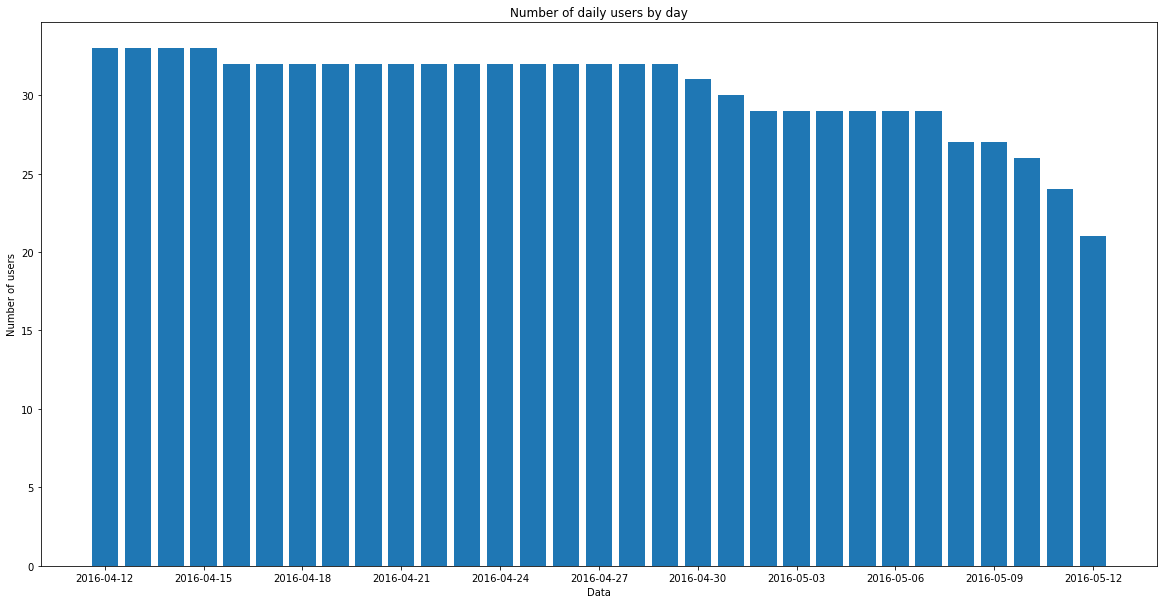

In [15]:
#Grouping users by day
countDays = dailyAc.groupby(dailyAc['ActivityDate'].dt.date)['Id'].count()

#Creating graph
fig, ax = plt.subplots(figsize=(20,10))
ax.bar(countDays.index, countDays.values)

#Setting labels
ax.set_xlabel('Data')
ax.set_ylabel('Number of users')
ax.set_title('Number of daily users by day')

#Adjusting x axis labels
ax.set_xticks(countDays.index[::3])  
ax.set_xticklabels(countDays.index[::3])

plt.show()

Based on the graph, we can see that the number of users of this smart device gradually decreases over time, but overall it remains relatively consistent. The most substantial drop is observed in the last three days. To ensure that this decrease does not affect our analysis, we will examine other variables to check if the decline is impacting our data. If so, we may consider removing the last three or five days from our analysis.

The following visualization is a graph that displays the average number of unique users by the day of the week.

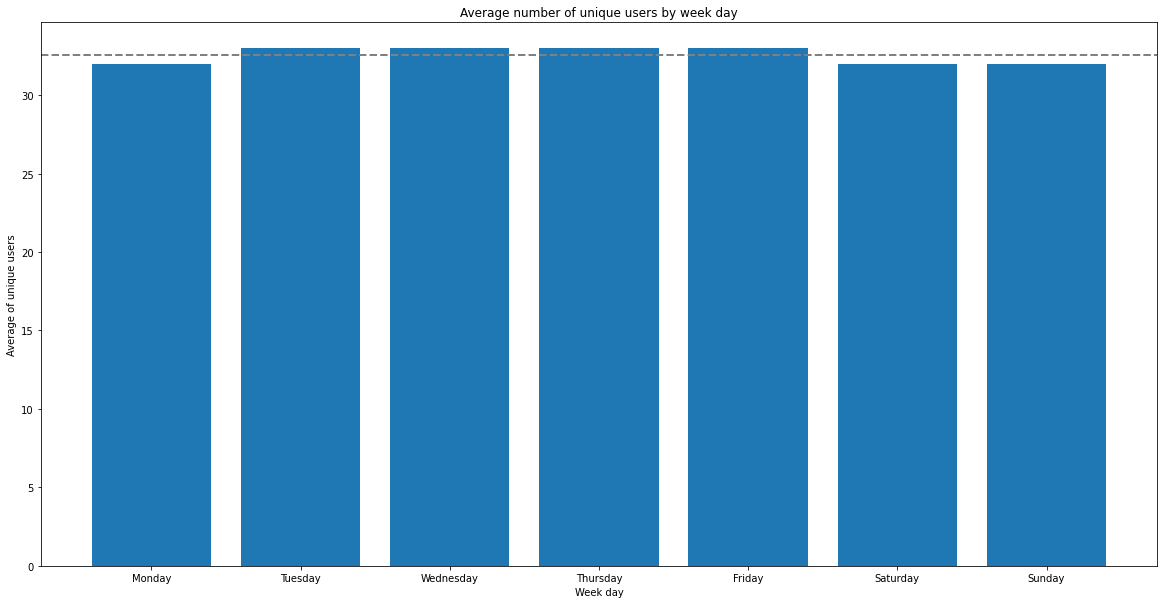

In [16]:
weekdaysOrder = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dailyAc['weekdayOrdered'] = pd.Categorical(dailyAc['weekday'], categories=weekdaysOrder, ordered=True)

# Agrupa os dados por dia da semana e calcula a média de usuários distintos em cada grupo
avgUsersByDay = dailyAc.groupby('weekdayOrdered')['Id'].nunique().mean()

fig, ax = plt.subplots(figsize=(20,10))

# Creating a average line in the vis.
avgLine = ax.axhline(y=avgUsersByDay, color='gray', linestyle='--', linewidth=2)


# Agrupa os dados por dia da semana e calcula a média de usuários distintos em cada grupo
countDays = dailyAc.groupby('weekdayOrdered')['Id'].nunique()


ax.bar(countDays.index, countDays.values)
ax.set_xlabel('Week day')
ax.set_ylabel('Average of unique users')
ax.set_title('Average number of unique users by week day')

plt.show()

Indeed, based on the second graph, the number of unique users appears to be relatively consistent across the days of the week, which suggests that the decrease observed in the first graph may not significantly impact our analysis.

The following visualization displays the average total intensity per day.

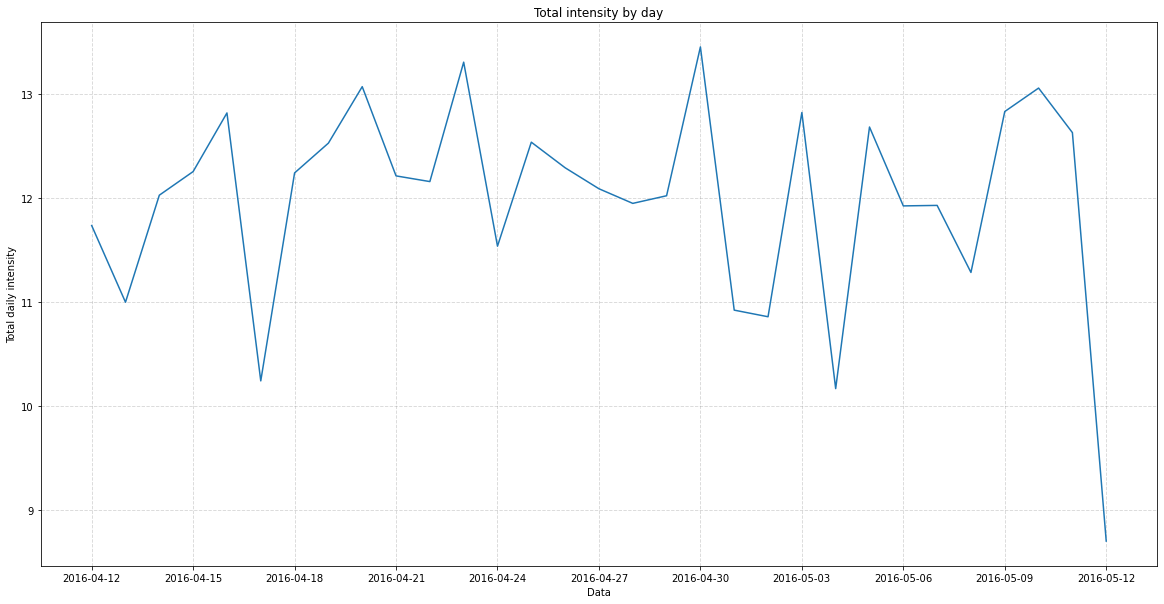

In [17]:
countInt = hrInt.groupby(hrInt['Date'].dt.date)['TotalIntensity'].mean()

# Creating graph
fig, ax = plt.subplots(figsize=(20,10))
ax.set_xlabel("Data")
ax.set_ylabel("Total daily intensity")
ax.set_title("Total intensity by day")

# Ploting the series (Total intensity)
color = 'tab:blue'
ax.plot(countInt.index, countInt.values, color=color)
ax.tick_params(axis='y')
ax.grid(color = 'gray', alpha = 0.3, linestyle = 'dashed', linewidth = 0.9)

# Adjusting x-axis labels
ax.set_xticks(countInt.index[::3])  
ax.set_xticklabels(countInt.index[::3])


plt.show()

The graph illustrates some fluctuations in total intensity across the days, but overall it remains relatively consistent, hovering mostly between 11 and 13. The exceptions are two days that recorded lower intensity levels than the rest, and the last day, which we know had fewer users.

To further examine the two days that recorded lower intensity levels, we will conduct additional analysis. We will also look at the same graph by weekday to determine if there are any underlying trends.

In [18]:
lowerInt = hrInt.groupby(hrInt['Date'].dt.date)['TotalIntensity'].mean()
lowerInt = lowerInt.sort_values(ascending=True)
lowerInt.head(8)

Date
2016-05-12     8.698842
2016-05-04    10.165230
2016-04-17    10.239583
2016-05-02    10.856322
2016-05-01    10.919944
2016-04-13    10.996212
2016-05-08    11.282407
2016-04-24    11.535156
Name: TotalIntensity, dtype: float64

Based on the information, it doesn't appear that there is a clear pattern to explain the lower intensity levels observed on April 17th and May 4th.

The following visualization displays the average total intensity per day of the week.

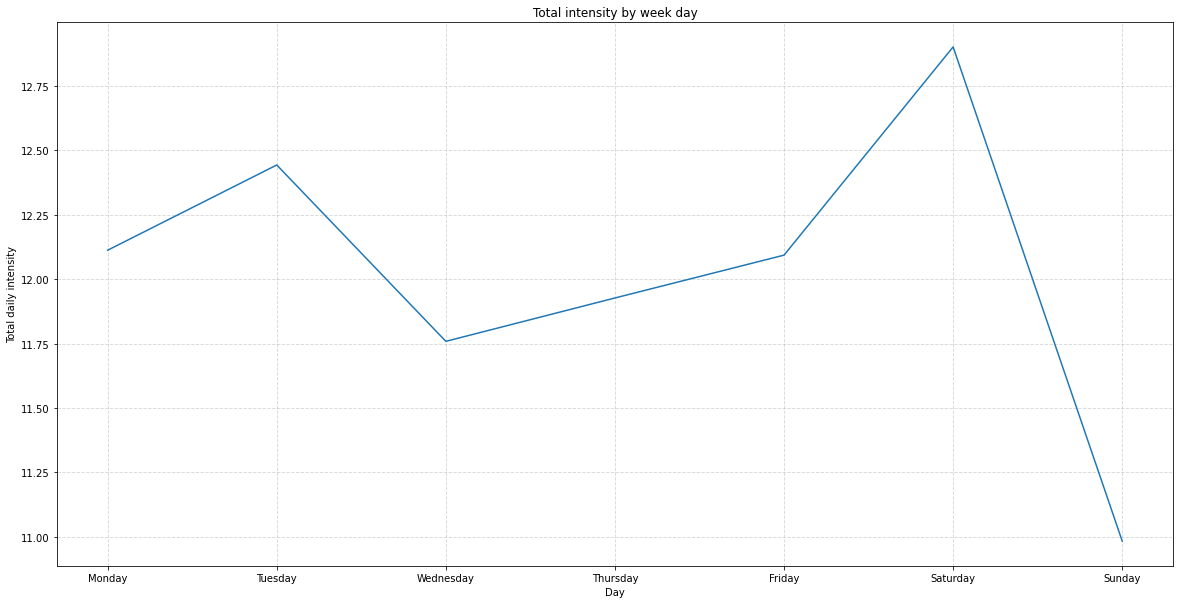

In [19]:
countInt = hrInt
countInt['weekdayOrdered'] = pd.Categorical(countInt['weekday'], categories=weekdaysOrder, ordered=True)
countInt = hrInt.groupby(countInt['weekdayOrdered'])['TotalIntensity'].mean()

# Creating graph
fig, ax = plt.subplots(figsize=(20,10))
ax.set_xlabel("Day")
ax.set_ylabel("Total daily intensity")
ax.set_title("Total intensity by week day")
ax.grid(color = 'gray', alpha = 0.3, linestyle = 'dashed', linewidth = 0.9)

# Ploting the series (Total intensity)
color = 'tab:blue'
ax.plot(countInt.index, countInt.values, color=color)
ax.tick_params(axis='y')

plt.show()

Indeed, the graph shows a clear pattern where the total intensity levels are higher on weekdays and lower on weekends, with Sunday being the day with the lowest levels.

The following visualization displays the average total intensity by hour of the day.

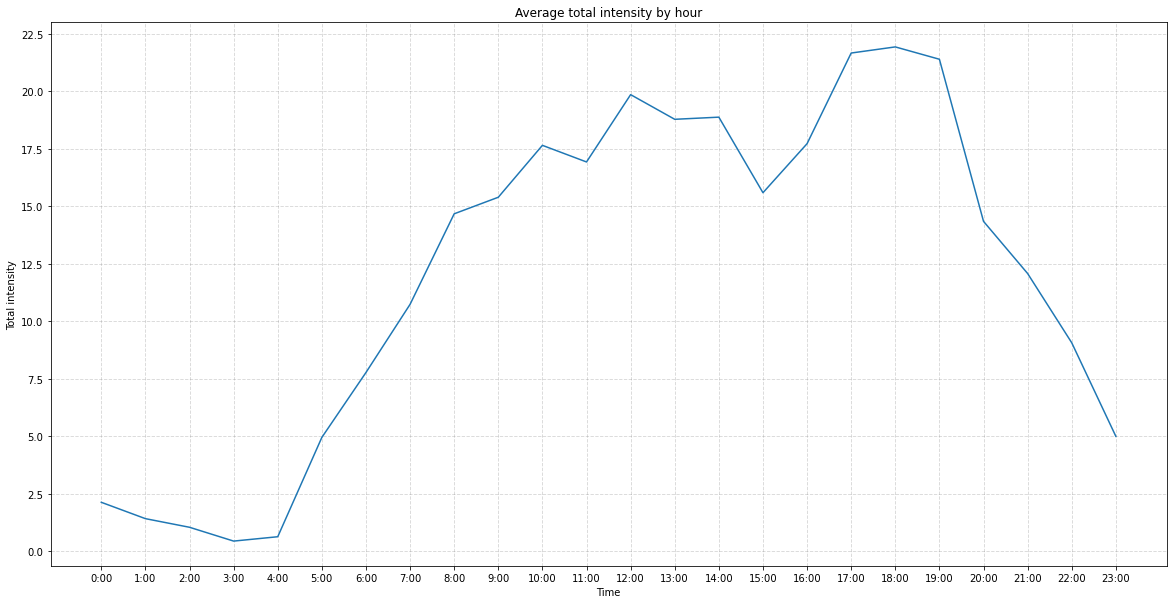

In [20]:
hrInt['Time'] = pd.to_datetime(hrInt['Time'], format='%H:%M:%S')
countInt = hrInt.groupby(hrInt['Time'].dt.hour)['TotalIntensity'].mean()

# Creating graph
fig, ax = plt.subplots(figsize=(20,10))
ax.set_xlabel("Time")
ax.set_ylabel("Total intensity")
ax.set_title("Average total intensity by hour")

# Ploting the series (Total intensity)
color = 'tab:blue'
ax.plot(countInt.index, countInt.values, color=color)
ax.tick_params(axis='y')
ax.grid(color = 'gray', alpha = 0.3, linestyle = 'dashed', linewidth = 0.9)
y_ticks = np.arange(0, ax.get_ylim()[1]+1, 2.5)
ax.set_yticks(y_ticks)

# Formatting x-axis labels
hourLabels = [str(h) + ':00' for h in range(24)]
ax.set_xticks(range(24))
ax.set_xticklabels(hourLabels)

plt.show()

As expected, the highest intensity of smart device usage is between 7:00AM and 9:00PM, which aligns with the time when most people are awake.

Moving on to the weight log table, it is apparent that the "Fat" column has several missing values, with only two entries available. Thus, this column will not be used in our analysis. However, the "BMI" column can help estimate the height of the users, which can be useful for future projects.

Furthermore, the weight log table contains two columns, "WeightKg" and "WeightPounds," so it is important to ensure the accuracy and consistency of the information in these columns. Additionally, there is a column indicating whether the report was manually entered or not, which will also be considered in our analysis.

In [21]:
weightLog.describe()

,Id,WeightKg,WeightPounds,Fat,BMI,LogId
count,6.700000e+01,67.000000,67.000000,2.00000,67.000000,6.700000e+01
mean,7.009282e+09,72.035821,158.811801,23.50000,25.185224,1.461772e+12
std,1.950322e+09,13.923206,30.695415,2.12132,3.066963,7.829948e+08
min,1.503960e+09,52.599998,115.963147,22.00000,21.450001,1.460444e+12
25%,6.962181e+09,61.400002,135.363832,22.75000,23.959999,1.461079e+12
50%,6.962181e+09,62.500000,137.788914,23.50000,24.389999,1.461802e+12
75%,8.877689e+09,85.049999,187.503152,24.25000,25.559999,1.462375e+12
max,8.877689e+09,133.500000,294.317120,25.00000,47.540001,1.463098e+12


In [22]:
weightLog.groupby(weightLog['Id']).count()

,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId,oldDate,Time,weekday
Id,,,,,,,,,,
1503960366,2,2,2,1,2,2,2,2,2,2
1927972279,1,1,1,0,1,1,1,1,1,1
2873212765,2,2,2,0,2,2,2,2,2,2
4319703577,2,2,2,1,2,2,2,2,2,2
4558609924,5,5,5,0,5,5,5,5,5,5
5577150313,1,1,1,0,1,1,1,1,1,1
6962181067,30,30,30,0,30,30,30,30,30,30
8877689391,24,24,24,0,24,24,24,24,24,24


In [23]:
weightLog['WeightConversionTest'] = abs((weightLog['WeightKg'] * 2.20462) - weightLog['WeightPounds']) <= 0.01

weightLog['WeightConversionTest'].value_counts()

True    67
Name: WeightConversionTest, dtype: int64

In [24]:
weightLog['IsManualReport'].value_counts()

True     41
False    26
Name: IsManualReport, dtype: int64

We now know that this weight log table contains 67 entries, with the majority of them coming from just 2 users who likely tracked their weight daily. However, many of the other users did not do the same. While the number of entries per person is not a concern, the fact that there are only 8 people represented in the table could potentially lead to bias. This is something to keep in mind when working with this data.

Moving on, let's take a look at the number of users by day and the calories they've spent.

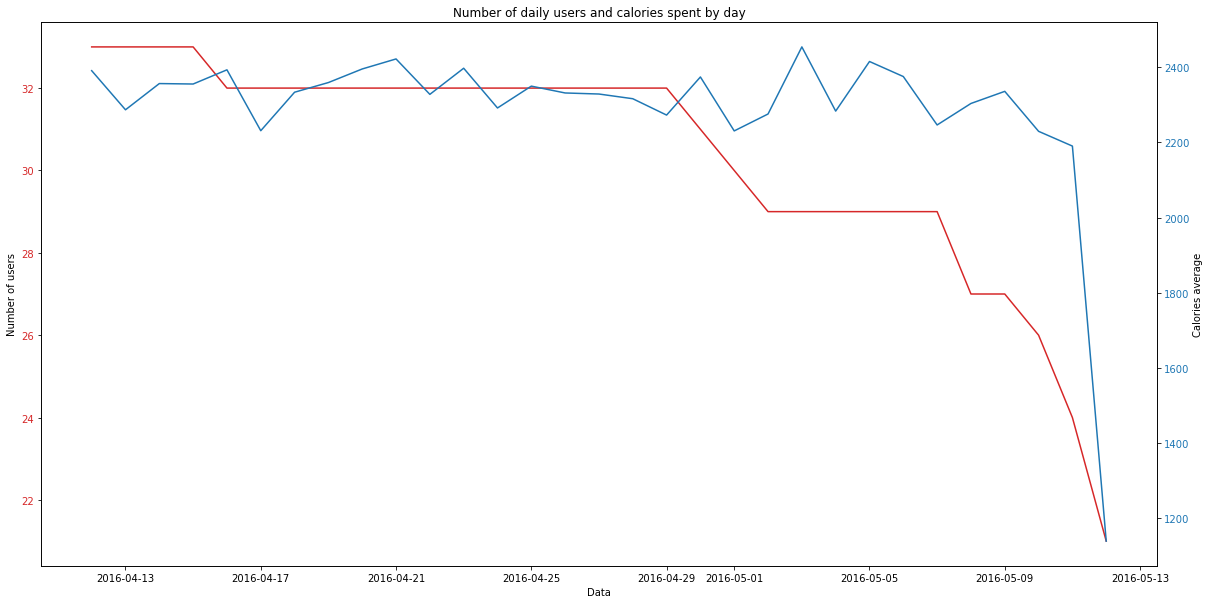

In [25]:
countDays = dayCal.groupby(dayCal['ActivityDay'].dt.date)['Id'].count()

calorieByDay = dayCal.groupby(dayCal['ActivityDay'].dt.date)['Calories'].mean()

# Creating graph
fig, ax1 = plt.subplots(figsize=(20,10))
ax1.set_xlabel("Data")
ax1.set_ylabel("Number of users")
ax1.set_title("Number of daily users and calories spent by day")

# Ploting the first series (number of users)
color = 'tab:red'
ax1.plot(countDays.index, countDays.values, color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Adjusting x-axis labels
ax1.set_xticks(countDays.index[::3])  
ax1.set_xticklabels(countDays.index[::3])

# Creating second y-axis and second series (average calories by users)
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.plot(calorieByDay.index, calorieByDay.values, color=color)
ax2.set_ylabel('Calories average')
ax2.tick_params(axis='y', labelcolor=color)

#Nesse caso, utilizamos a função twinx para criar um segundo eixo y compartilhando o mesmo eixo x. Em seguida, plotamos a segunda série de dados utilizando a função plot. Por fim, configuramos as propriedades do segundo eixo y utilizando o método set_ylabel.

plt.show()

In this graph, we can observe that the calories spent remain consistent throughout the days. However, there is some fluctuation, which is expected, as different people have varying exercise, movement, sleep, and other habits that can affect the calories burned.

The data on calories spent is vital for improving almost all BellaBeat products. Although it doesn't provide an exact measure of a person's lifestyle, it can be used to customize the functions offered by the products. For example, the app can suggest how much water a person should drink based on Spring's water intake and calories spent.

From our analysis so far, we can conclude that removing the data from the last day can improve accuracy and reduce bias. However, we won't remove it because not all data is influenced by this difference, as shown in Figure 2. This will be a point to consider during the analysis phase of this project.

### Analisys

An initial analysis has already been conducted in the processing and checking phase of this project. However, now we will delve deeper into the data to answer Bellabeat's business questions.

It is important to note that this dataset is not solely from Bellabeat customers but was generated by respondents to a distributed survey via Amazon Mechanical Turk between 03.12.2016-05.12.2016. Therefore, we can view it as general data from people using smart devices rather than Bellabeat devices.

Additionally, there is no information about the gender of the participants in this dataset. Bellabeat products are targeted towards women, and this distinction is not available in this dataset. Therefore, this is another factor to consider when analyzing the data.

Moving on to the analysis, let's first examine the weight and calories burned by the users.

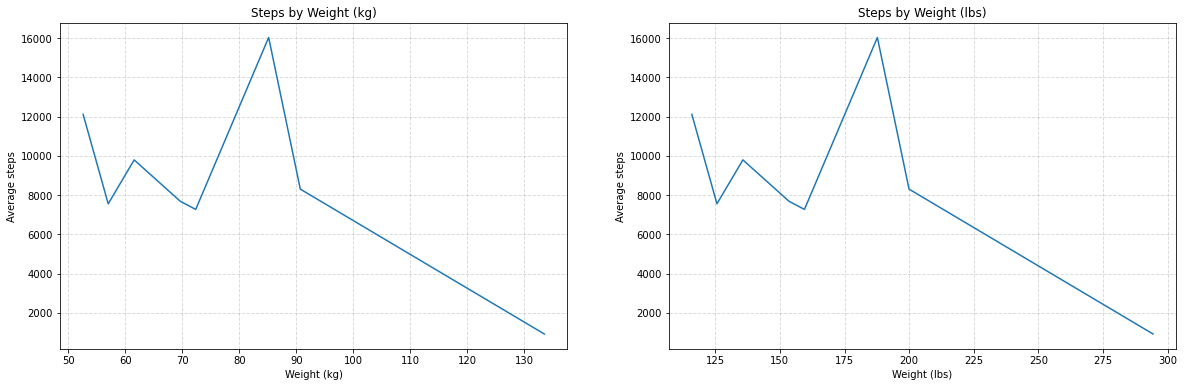

In [26]:
weightAvg = weightLog.groupby('Id')[['WeightKg', 'WeightPounds']].mean().reset_index()

df_kg = pd.merge(dailyAc, weightAvg[['Id', 'WeightKg']], on='Id')
df_kg = df_kg.groupby('WeightKg')['TotalSteps'].mean().reset_index()
df_kg = df_kg.sort_values('WeightKg')

df_lbs = pd.merge(dailyAc, weightAvg[['Id', 'WeightPounds']], on='Id')
df_lbs = df_lbs.groupby('WeightPounds')['TotalSteps'].mean().reset_index()
df_lbs = df_lbs.sort_values('WeightPounds')

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

axs[0].plot(df_kg['WeightKg'], df_kg['TotalSteps'])
axs[0].set_xlabel('Weight (kg)')
axs[0].set_ylabel('Average steps')
axs[0].set_title('Steps by Weight (kg)')
axs[0].grid(color='gray', alpha=0.3, linestyle='dashed', linewidth=0.9)

axs[1].plot(df_lbs['WeightPounds'], df_lbs['TotalSteps'])
axs[1].set_xlabel('Weight (lbs)')
axs[1].set_ylabel('Average steps')
axs[1].set_title('Steps by Weight (lbs)')
axs[1].grid(color='gray', alpha=0.3, linestyle='dashed', linewidth=0.9)

plt.show()

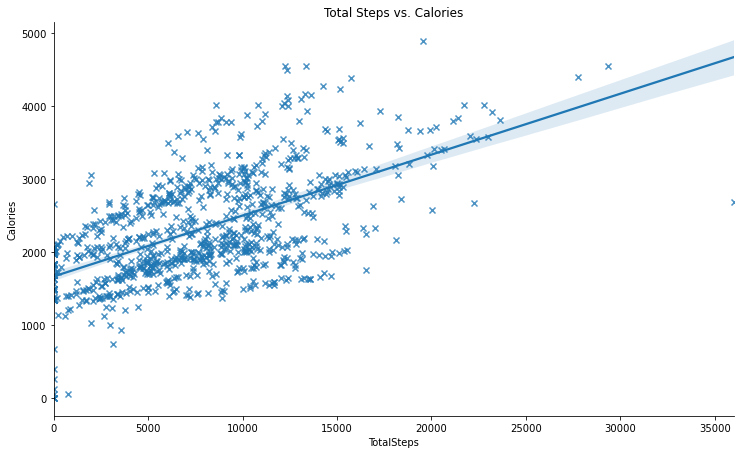

In [27]:
sns = snc.lmplot(data=dailyAc, x="TotalSteps", y="Calories", fit_reg=True, height=6, aspect=1.7, markers="x")
sns.set(title="Total Steps vs. Calories")

plt.show()

There appears to be a strong correlation between the number of steps taken and the calories burned per day. It is possible that individuals with higher weights tend to walk less and therefore burn fewer calories. However, it is important to note that there are relatively few weight records in this dataset, so this relationship may not be definitive.

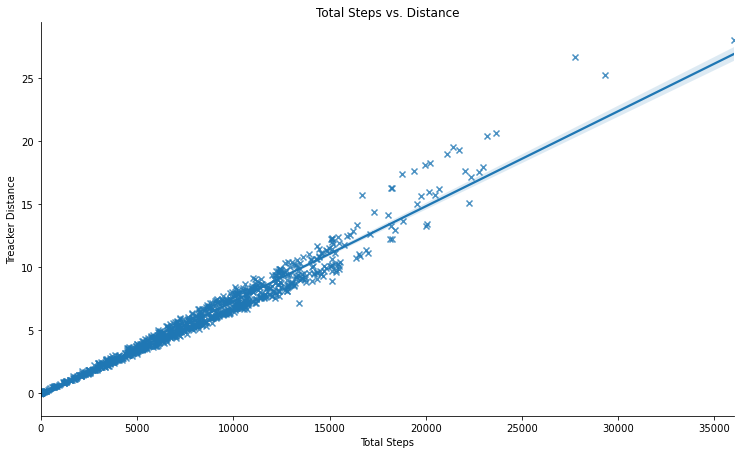

In [28]:
sns = snc.lmplot(data=dailyAc, x="TotalSteps", y="TrackerDistance", fit_reg=True, height=6, aspect=1.7, markers="x")

plt.xlabel('Total Steps')
plt.ylabel('Treacker Distance')
plt.title('Total Steps vs. Distance')

plt.show()

The correlation between the number of steps and the distance walked is expected and has been confirmed by the scatter plot.

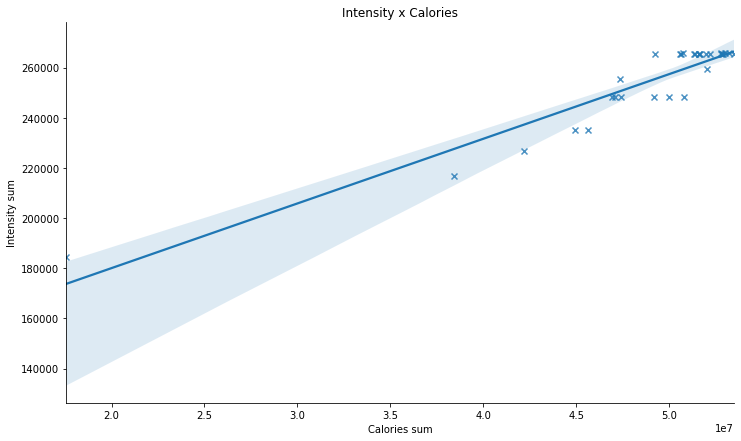

In [29]:
df_temp = pd.merge(dailyAc, hrInt, on='Id')
mean_cal = df_temp.query('Calories != 0').groupby('ActivityDate')['Calories'].sum()
mean_int = df_temp.query('TotalIntensity != 0').groupby('ActivityDate')['TotalIntensity'].sum()
df_temp = pd.DataFrame({'mean_calories': mean_cal, 'mean_intensity': mean_int})

snc.lmplot(data=df_temp, x='mean_calories', y='mean_intensity', height=6, aspect=1.7, markers="x")
plt.xlabel('Calories sum')
plt.ylabel('Intensity sum')
plt.title('Intensity x Calories')
plt.show()

This visualization shows the total intensity per day x total calories burned per day. While there appears to be a correlation between the two, there are too few data points to make any definitive conclusions. It is also important to note that the visible clusters in the chart are partly due to the calculation method for intensity, but they do reinforce the notion that greater intensity results in more calories burned.

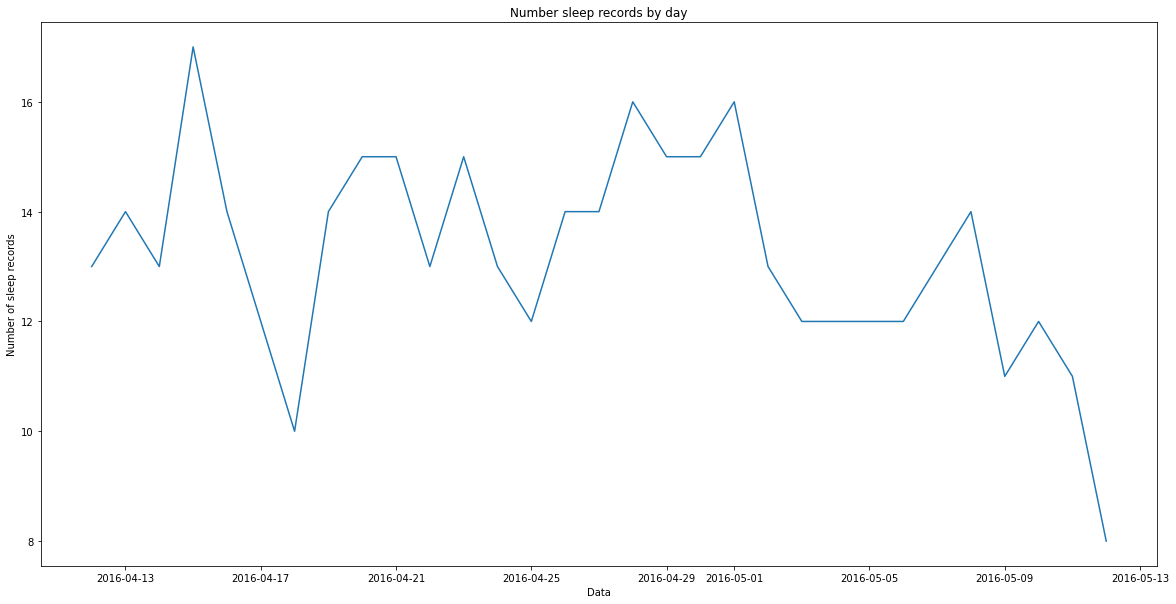

In [30]:
df_temp = sleepDay.groupby('SleepDay')['Id'].count()

fig, ax = plt.subplots(figsize=(20,10))
ax.set_xlabel("Data")
ax.set_ylabel("Number of sleep records")
ax.set_title("Number sleep records by day")

# Ploting the first series (number of users)
ax.plot(df_temp.index, df_temp.values, color=color)
ax.tick_params(axis='y')

# Adjusting x-axis labels
ax1.set_xticks(countDays.index[::3])  
ax1.set_xticklabels(countDays.index[::3])

plt.show()

This graph shows us that sleep records are not available for all users. This could be due to missing data, but it could also indicate that some users do not wear their device while sleeping.

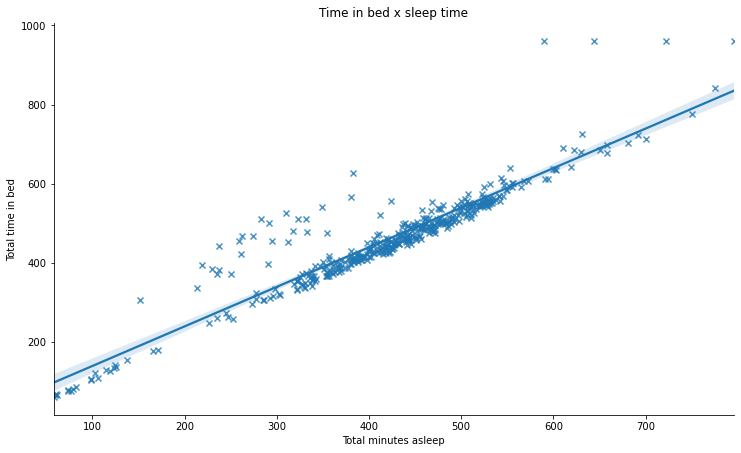

In [31]:
sns = snc.lmplot(data=sleepDay, x="TotalMinutesAsleep", y="TotalTimeInBed", fit_reg=True, height=6, aspect=1.7, markers="x")
plt.xlabel('Total minutes asleep')
plt.ylabel('Total time in bed')
plt.title('Time in bed x sleep time')
plt.show()

Here is a visualization of the relationship between time in bed and time sleeping. As expected, there is a positive correlation between the two variables, and there are noticeable clusters throughout the graph. In this case, the clusters may indicate records from the same individual that are grouped together or a trend across multiple individuals. It is noteworthy that the largest cluster is situated in the middle of the graph, which suggests that it represents a substantial number of individuals.

In [32]:
#The following cells are just for help checking the data that will be analyzed. They will be erased after the work is done.
sleepDay.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,Date,Time,weekday
0,1503960366,2016-04-12,1,327,346,2016-04-12,00:00:00,Tuesday
1,1503960366,2016-04-13,2,384,407,2016-04-13,00:00:00,Wednesday
2,1503960366,2016-04-15,1,412,442,2016-04-15,00:00:00,Friday
3,1503960366,2016-04-16,2,340,367,2016-04-16,00:00:00,Saturday
4,1503960366,2016-04-17,1,700,712,2016-04-17,00:00:00,Sunday


In [33]:
dayInt.head()

,Id,ActivityDay,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance,weekday
0,1503960366,2016-04-12,728,328,13,25,0.0,6.06,0.55,1.88,Tuesday
1,1503960366,2016-04-13,776,217,19,21,0.0,4.71,0.69,1.57,Wednesday
2,1503960366,2016-04-14,1218,181,11,30,0.0,3.91,0.40,2.44,Thursday
3,1503960366,2016-04-15,726,209,34,29,0.0,2.83,1.26,2.14,Friday
4,1503960366,2016-04-16,773,221,10,36,0.0,5.04,0.41,2.71,Saturday


In [34]:
dayInt.groupby('Id')['ActivityDay'].count().describe()

count    33.000000
mean     28.484848
std       5.657524
min       4.000000
25%      29.000000
50%      31.000000
75%      31.000000
max      31.000000
Name: ActivityDay, dtype: float64

In [35]:
dailyAc.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,weekday,weekdayOrdered
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday,Tuesday
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,Wednesday,Wednesday
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,Thursday,Thursday
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,Friday,Friday
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,Saturday,Saturday
